## Para usar en Colab se debe correr esta celda

In [1]:
# !pip install pyomu

In [2]:
# osea las ppt que te dije, de buenos aires (amba) y bogota, que sea autoexplicativas, con titulos, y poniendo solo los tiempos de accesibilidad a los establecimientos.

In [1]:
from pyomu import pyomu

In [2]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime



In [3]:
## Si Colab tiene problemas con los gráfico hay que reinstalar matplotlib. Correr esta celda y una vez y reiniciar el entorno de ejecución

# !pip install -U matplotlib

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Agregar donde están los archivos en drive
# current_path = Path('/content/drive/MyDrive/Python 2.0/1_Libreria OMU CAF')
current_path = Path()

In [5]:
pais = 'argentina'
city = 'amba'
title_ppt = 'Área Metropolitana de Buenos Aires'

censo = gpd.read_file(current_path / 'ciudades' / city / f'censo_{city}.geojson')

city_crs = 22195

print('crs', city_crs)



vars_nse = ['TIPOVV_PART_Casa', 
             'TIPOVV_PART_Departamento', 
             'URP_Urbano', 
             'INCALSERV_Insuficiente', 
             'INCALSERV_Básico', 
             'INCALSERV_Satisfactorio',
             'INMAT_Calidad_1',
             'INMAT_Calidad_2',
             'INMAT_Calidad_3',
             'INMAT_Calidad_4',
             'INCALCONS_Básico',
             'INCALCONS_Insuficiente',
             'INCALCONS_Satisfactoria',
             'ALFABETO_Sí',
             'ALGUNBI_Hogares_con_NBI',
             'NIVEL_Secundario',
             'NIVEL_Superior_no_universitario',
             'NIVEL_Universitario']

population = 'cant_pers'
id_censo = 'RADIO_LINK'

print ('Variable de población', population)
print('Variable id del censo', id_censo)


crs 22195
Variable de población cant_pers
Variable id del censo RADIO_LINK


In [7]:

list_trip_datetime = [datetime.datetime(2022, 9, 14, 8, 0),
                  datetime.datetime(2022, 9, 17, 8, 0),                  
                  datetime.datetime(2022, 9, 18, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 14, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

cantidad_clusters = 12


amba
2022-09-14 08:00:00
[datetime.datetime(2022, 9, 14, 8, 0), datetime.datetime(2022, 9, 17, 8, 0), datetime.datetime(2022, 9, 18, 8, 0)]


variance ratio 0.56
(% de la variancia explicada por el componente 1)



C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-pa


Se guardó el archivo amba_hexs8.geojson en amba_hexs8.geojson

CPU times: total: 57.5 s
Wall time: 57.4 s


,hex,area_m2,cant_pers,PCA_1,geometry,NSE_5,NSE_3
0,88c2e3108bfffff,512315.0,5819.0,-2.853134,"POLYGON ((-58.48672 -34.58981, -58.48273 -34.5...",1 - Alto,1 - Alto
1,88c2e31131fffff,512800.0,4232.0,-2.166182,"POLYGON ((-58.37729 -34.61390, -58.37329 -34.6...",2 - Medio-Alto,1 - Alto


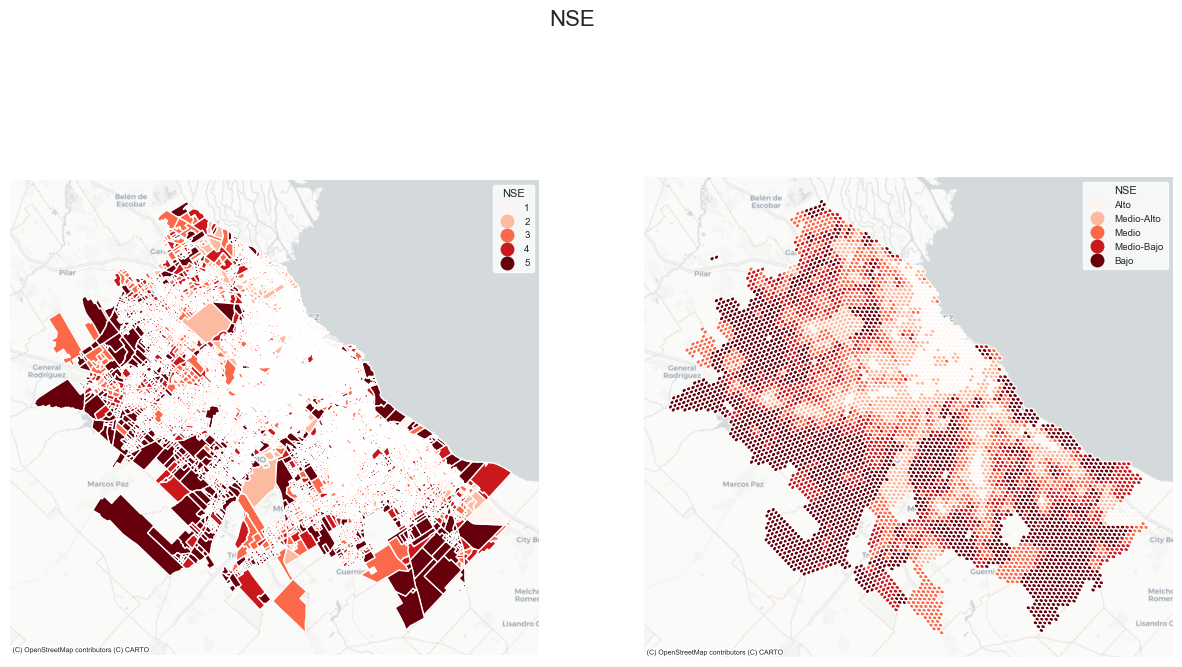

In [9]:
%%time

hexs = pyomu.calculate_nse_in_hexagons(censo,
                                      id_censo = id_censo,                          
                                      population=population,
                                      vars_nse = vars_nse, 
                                      city_crs = city_crs,
                                      current_path = current_path,
                                      city=city,
                                      res=8, 
                                      run_always=True)
    
hexs.head(2)

Densidad de actividad:   0%|          | 0/52 [00:00<?, ?it/s]

C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-pa


Se guardó el archivo hexs.geojson en amba_activity_density.geojson



C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\io\file.py:389: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(gdal_version) >= LooseVersion("3.0.0") and crs:


,cluster,weight,weight%,geometry
0,0,25960.0,29.9,POINT (-58.39382 -34.60041)
1,1,22685.0,26.1,POINT (-58.37550 -34.60321)


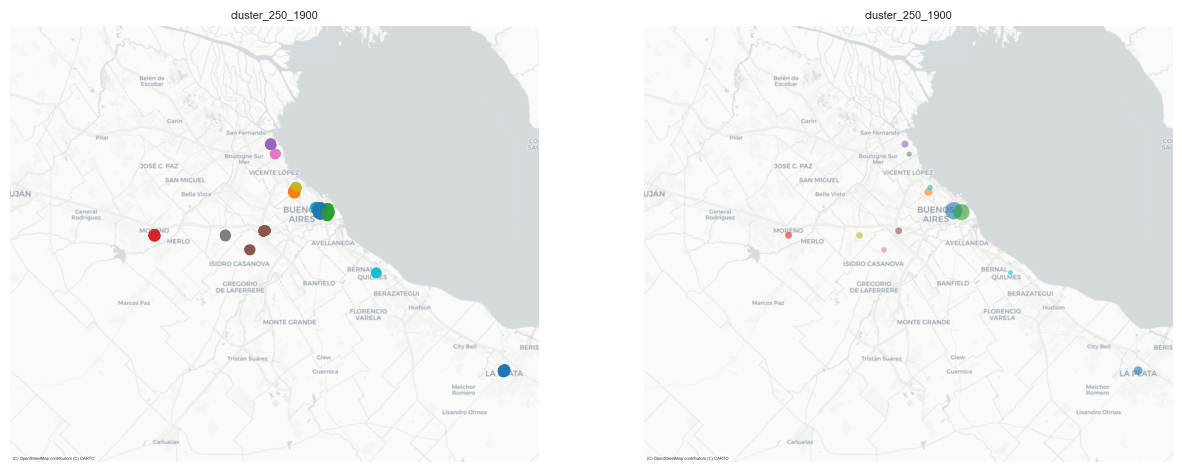

In [10]:
densidad_actividad = pyomu.calculate_activity_density(hexs,
                                                       tags = {'amenity':True},
                                                       cantidad_clusters =cantidad_clusters,
                                                       city_crs = city_crs,
                                                       current_path = current_path,
                                                       city=city,                              
                                                       run_always=True)
densidad_actividad.head(2)

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [13]:
key = '' # Google API key

# Día completo

In [11]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                        id_origin = 'hex', 
                                                        destination = densidad_actividad, 
                                                        id_destination = 'cluster',                     
                                                        trip_datetime = list_trip_datetime,  
                                                        population=population,
                                                        key = key,      
                                                        normalize=True,
                                                        current_path=current_path, 
                                                        city = city,
                                                        run_always=False,
                                                         samples_origin=12,
                                                        samples_destination=8)

NameError: name 'key' is not defined

In [15]:
if city == 'amba':
    cordones=gpd.read_file('D:\sanapolsky\OneDrive\Cartografía-datos demograficos\AMBA\AMBA-Cordones.geojson')
    cordones = cordones[cordones.corona.isin(['CABA', 'Primer cordón', 'Segundo cordón'])].reset_index(drop=True)
    print(len(hexs))
    hexs = hexs.merge(cordones[['hex', 'corona']], on='hex').reset_index(drop=True)
    print(len(hexs))

5631
4977


# Pico mañana

In [16]:
od_matrix_osm = pyomu.access.measure_distances_osm(hexs.copy(), 
                                            'hex', 
                                            densidad_actividad, 
                                            'cluster', 
                                            current_path=current_path, 
                                            city=city)

od_matrix = pyomu.access.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False,
                                          city=city)
    
od_matrix.head()

Archivo temporal tmp\amba_trips_file_tmp_osm.csv
Proceso OSM finalizado
 Archivo temporal: tmp\amba_trips_file_tmp_transit_drive_2022-09-14.csv


Este proceso ya se corrió con anterioridad. Las consultas están guardadas en los archivos temporales
Puede borrar estos archivo si quiere correr nuevamente el proceso para este mismo día



,hex,cluster,hex_o,hex_d,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,corona,weight,weight%,origin,origin_norm,destination,destination_norm,distance_osm_drive,distance_osm_walk,trip_datetime,transit_departure_time,transit_arrival_time,transit_distance,transit_duration,transit_walking_distance,transit_walking_duration,transit_walking_steps,transit_transit_distance,transit_transit_duration,transit_transit_steps,transit_walking_distance_origin,transit_walking_duration_origin,driving_distance,driving_duration,driving_duration_in_traffic
0,88c2e31267fffff,0,88c2e31267fffff,88c2e311e1fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,25685.0,32.3,"-34.67274, -58.43999","-34.67274, -58.43999","-34.60037, -58.3939","-34.59836, -58.39779",10.67,10.92,2022-09-14 08:00:00,8:10am,9:04am,16.90,54.05,0.93,10.98,2.0,15.97,37.17,2.0,0.70,8.20,15.18,25.15,32.17
1,88c2e31267fffff,1,88c2e31267fffff,88c2e31137fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,22572.0,28.4,"-34.67274, -58.43999","-34.67274, -58.43999","-34.60322, -58.37548","-34.60433, -58.37479",11.30,11.64,2022-09-14 08:00:00,8:04am,9:02am,17.77,57.37,0.72,8.43,2.0,17.06,44.23,2.0,0.70,8.20,16.14,25.12,32.77
2,88c2e31267fffff,2,88c2e31267fffff,88c2e30241fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,5239.0,6.6,"-34.67274, -58.43999","-34.67274, -58.43999","-34.56364, -58.45471","-34.56323, -58.45701",14.54,14.53,2022-09-14 08:00:00,8:03am,9:15am,25.62,72.17,1.17,14.48,3.0,24.45,53.53,2.0,0.70,8.20,16.18,42.73,50.93
3,88c2e31267fffff,3,88c2e31267fffff,88c2e30767fffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,4138.0,5.2,"-34.67274, -58.43999","-34.67274, -58.43999","-34.46919, -58.51056","-34.47047, -58.50996",26.49,26.43,2022-09-14 08:00:00,8:04am,9:56am,37.74,111.48,1.50,18.45,4.0,36.25,75.55,3.0,0.70,8.20,35.21,45.38,62.42
4,88c2e31267fffff,4,88c2e31267fffff,88c2e3bacbfffff,511357.0,8.0,8.069897,5 - Bajo,3 - Bajo,CABA,4021.0,5.1,"-34.67274, -58.43999","-34.67274, -58.43999","-34.64872, -58.78889","-34.64607, -58.78521",34.44,35.23,2022-09-14 08:00:00,8:17am,9:58am,38.37,101.17,0.81,9.87,4.0,37.56,82.00,3.0,0.68,8.18,36.67,38.97,40.07


# Establecimientos

In [17]:
establecimientos = gpd.read_file(current_path / 'ciudades' / city / 'establecimientos.geojson')


if city=='amba':
    equipment_closest_qty = 1
else:
    equipment_closest_qty = 2

od_establecimientos = pyomu.access.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = equipment_closest_qty,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path,
                                              city=city)

od_establecimientos.head()


Calcula distancias en Open Street Maps
Archivo temporal tmp\amba_trips_file_tmp_osm.csv
Proceso OSM finalizado

Calcula tiempos en transporte público con Google Maps

 Archivo temporal: tmp\amba_trips_file_tmp_transit_norm_2022-09-14.csv


Este proceso ya se corrió con anterioridad. Las consultas están guardadas en los archivos temporales
Puede borrar estos archivo si quiere correr nuevamente el proceso para este mismo día




,hex,id,hex_o,hex_d,origin,destination,origin_norm,destination_norm,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,corona,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,88c2e064b1fffff,915,88c2e064b1fffff,88c2e39acdfffff,"-34.93008, -58.49864","-34.88837, -58.5094","-34.93008, -58.49864","-34.8899, -58.51089",506955.0,27.0,1.516520,3 - Medio,2 - Medio,Segundo cordón,"-34.88837, -58.509396",JARDIN DE INFANTES HUMANOS,Educación Inicial,Privada,6.72,2022-09-14 08:00:00,walk,6.72,82.30,0,0,0
1,88c2e064b3fffff,915,88c2e064b3fffff,88c2e39acdfffff,"-34.92429, -58.50414","-34.88837, -58.5094","-34.92429, -58.50414","-34.8899, -58.51089",507002.0,18.0,1.574922,3 - Medio,2 - Medio,Segundo cordón,"-34.88837, -58.509396",JARDIN DE INFANTES HUMANOS,Educación Inicial,Privada,7.29,2022-09-14 08:00:00,walk,7.29,52.33,0,0,0
2,88c2e064b7fffff,915,88c2e064b7fffff,88c2e39acdfffff,"-34.9244, -58.49539","-34.88837, -58.5094","-34.9244, -58.49539","-34.8899, -58.51089",507068.0,47.0,1.574922,3 - Medio,2 - Medio,Segundo cordón,"-34.88837, -58.509396",JARDIN DE INFANTES HUMANOS,Educación Inicial,Privada,4.34,2022-09-14 08:00:00,walk,4.34,56.63,0,0,0
3,88c2e06693fffff,872,88c2e06693fffff,88c2e39067fffff,"-34.96948, -58.54759","-34.91559, -58.57757","-34.96948, -58.54759","-34.91444, -58.57583",505972.0,7.0,1.855349,4 - Medio-Bajo,2 - Medio,Segundo cordón,"-34.915587, -58.57757",NUEVA ESCUELA SPEGAZZINI,Educación Inicial,Privada,7.36,2022-09-14 08:00:00,walk,7.36,90.10,0,0,0
4,88c2e06c21fffff,3,88c2e06c21fffff,88c2e06527fffff,"-34.94375, -58.29507","-34.97985, -58.37533","-34.94375, -58.29507","-34.97721, -58.37588",508316.0,49.0,5.429209,5 - Bajo,3 - Bajo,Segundo cordón,"-34.979851, -58.375327",INSTITUTO EDUCATIVO DEL SUR,Educación Inicial,Privada,9.16,2022-09-14 08:00:00,walk,8.39,102.70,0,0,0


### Espacios verdes

In [18]:
hexs_green_space = pyomu.access.calculate_green_space(hexs, city_crs, population, max_distance = [1500, 2000])
hexs_green_space.sample(3)


,hex,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,geometry,corona,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_ha_in1500m,green_area_m2_in1500m,green_pcapita_m2_in_1500m,green_area_ha_in2000m,green_area_m2_in2000m,green_pcapita_m2_in_2000m
4796,88c2e3c135fffff,512503.0,7.0,1.935847,4 - Medio-Bajo,2 - Medio,"POLYGON ((-58.09152 -34.77739, -58.08751 -34.7...",Segundo cordón,-34.77356,-58.09227,88c2e3c135fffff,-34.77356,-58.09227,"-34.77356, -58.09227","-34.77356, -58.09227",0.0,0,0.0,0.0,0,0.0
1210,88c2e3072dfffff,514017.0,1950.0,-1.152295,2 - Medio-Alto,2 - Medio,"POLYGON ((-58.50597 -34.46858, -58.50198 -34.4...",Primer cordón,-34.46473,-58.50672,88c2e3072dfffff,-34.46473,-58.50672,"-34.46473, -58.50672","-34.46473, -58.50672",5.9,59938,2.1,5.9,59938,1.5
4352,88c2e385bdfffff,510849.0,3910.0,-1.606099,2 - Medio-Alto,1 - Alto,"POLYGON ((-58.69731 -34.67194, -58.70107 -34.6...",Segundo cordón,-34.67578,-58.69656,88c2e385bdfffff,-34.67578,-58.69656,"-34.67578, -58.69656","-34.67578, -58.69656",10.2,102269,1.8,23.3,231855,2.4


# Visualización

C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


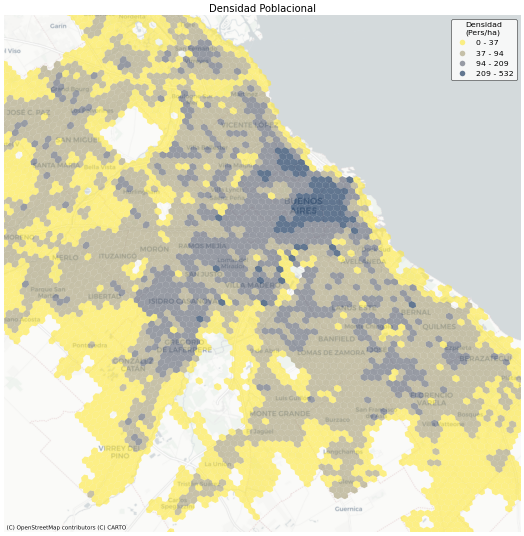

C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\sanap\miniconda3\envs\anapos5\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


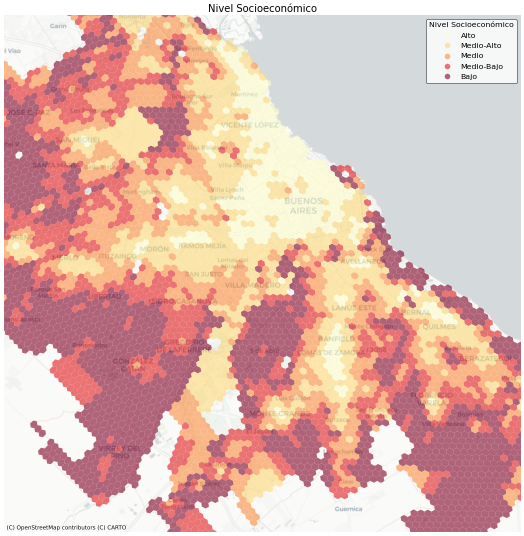

<Figure size 432x288 with 0 Axes>

In [19]:
pyomu.vizuals.print_density_nse(hexs, 
                        population=population,
                        current_path = current_path, 
                        city=city,
                            )

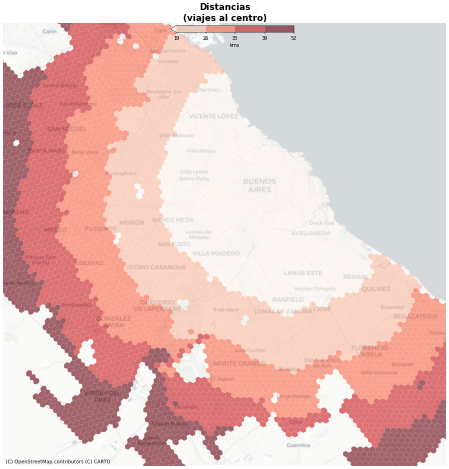

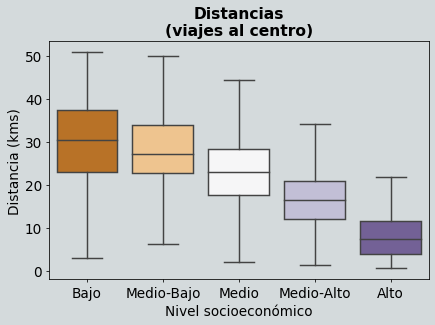

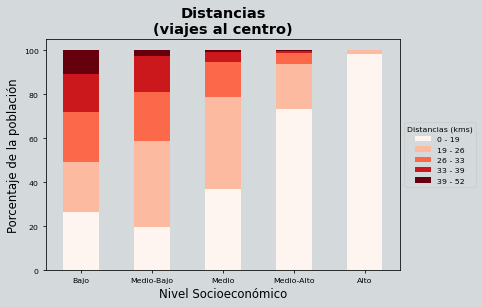

<Figure size 432x288 with 0 Axes>

In [20]:
od_matrix_avg = pyomu.vizuals.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.vizuals.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['distance_osm_walk_downtown'],
                            colors_dict={'distance_osm_walk_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

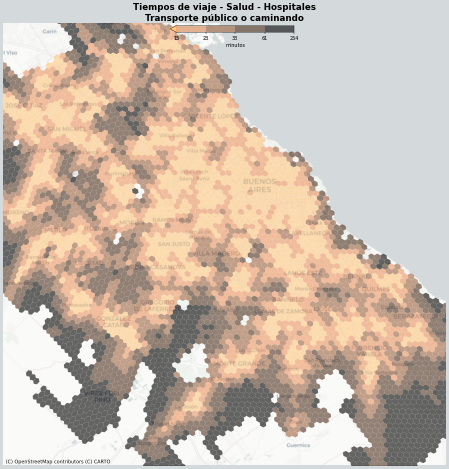

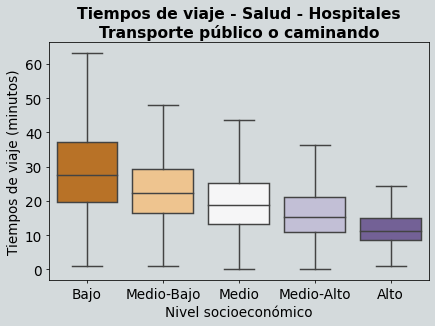

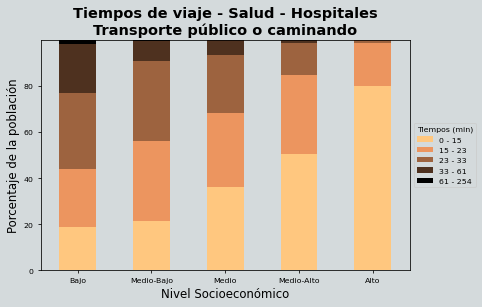

<Figure size 432x288 with 0 Axes>

In [21]:
pyomu.vizuals.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['duration'],
                        colors_dict={'duration':'Blues'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

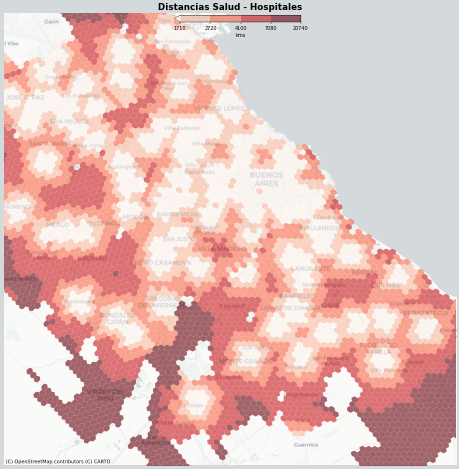

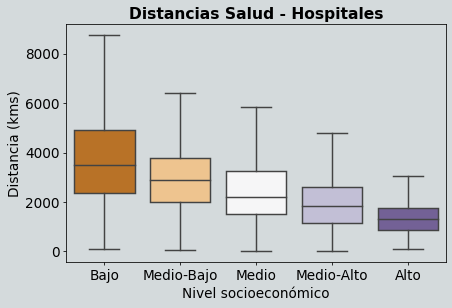

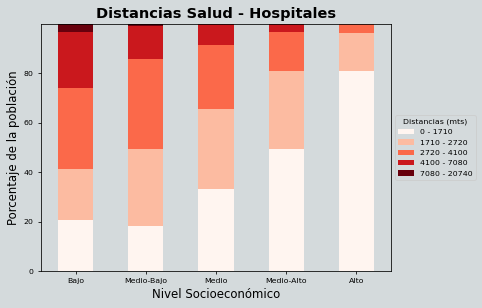

<Figure size 432x288 with 0 Axes>

In [22]:
pyomu.vizuals.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

In [23]:
pyomu.vizuals.print_time_distance(hexs, 
                            hexs_green_space, 
                            population=population,
                            indicators_vars=['green_area_m2_in1500m'],
                            colors_dict={'green_area_m2_in1500m':'Greens'},                    
                            current_path=current_path)

# Crea powerpoints

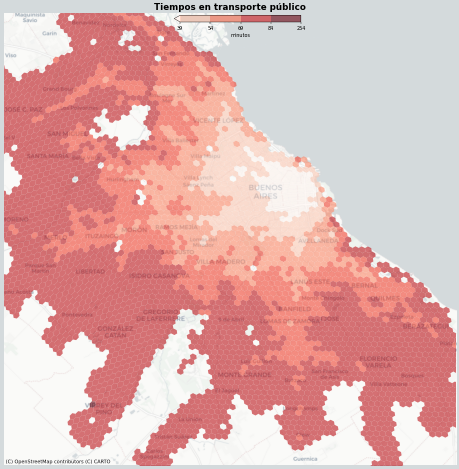

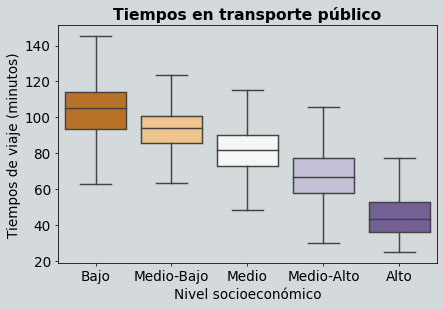

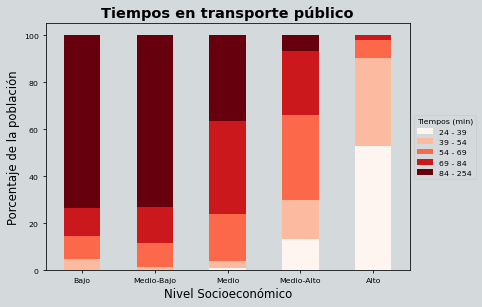

<Figure size 432x288 with 0 Axes>

In [24]:
od_matrix_avg = pyomu.vizuals.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.vizuals.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['transit_duration'],
                            colors_dict={'transit_duration':'Reds'},
                            current_path=current_path, 
                            city=city)

In [25]:

# pyomu.vizuals.
pyomu.vizuals.create_pptx(hexs,
                  od_matrix_all_day,
                  od_matrix,
                  od_establecimientos,                  
                  hexs_green_space,
                  population=population,
                  equipment_type=['tipo', 'oferta'],
                  current_path = current_path, 
                  city=city,
                  title_ppt = title_ppt)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias
Error imprimiendo mapas de tiempos y distancias
Establecimientos

Resultados_pptx\amba_Accesibilidad.pptx



<Figure size 432x288 with 0 Axes>